In [1]:
from multiomicscellsim.cpm.simulation import CPM
from multiomicscellsim.cpm.cpmentities import CPMCellType, CPMGrid
from multiomicscellsim.cpm.constraints import VolumeConstraint, AdhesionConstraint, PerimeterConstraint

Precomputing Neighbors...


  0%|          | 0/9 [00:00<?, ?it/s]/Users/edoardo.giacomello/Projects/Voronoi/multiomicscellsim/cpm/simulation.py:63: RuntimeWarning: overflow encountered in exp
  boltzman_prob = np.exp(-total_delta_energy/self.grid.temperature)
100%|██████████| 9/9 [00:22<00:00,  2.49s/it]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


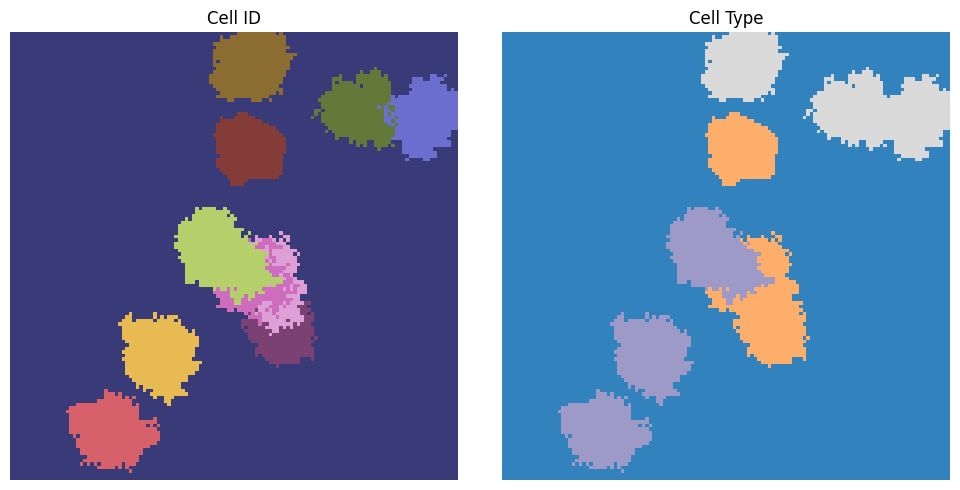

In [ ]:
import math 

grid_size = 128
n_initial_cells = 10

bka = 15.0 # background adhesion
sla = 0.0 # self adhesion
ciruclar_perimeter = lambda area: int(round(2 * math.sqrt(math.pi * area)))



scale_area = lambda area, grid_size=grid_size: area*grid_size*grid_size
volumes = [int(scale_area(a, grid_size=grid_size)) for a in [0.02, 0.05, 0.10]]
perimeters = [int(ciruclar_perimeter(a)) for a in volumes]

# Also defines cell type number
adhesion_matrix = [[sla, bka,  bka,  bka],
                   [bka, sla, 10.0, 15.0],
                   [bka, 10.0, sla, 15.0],
                   [bka, 15.0,  15.0,  sla]]


cell_types = [
    CPMCellType(id=0, adhesion_energy=adhesion_matrix[0], name="background"),
]

n_cell_types = len(adhesion_matrix) - 1
for ct in range(n_cell_types):
    pref_volume = volumes[ct]
    pref_perimeter = perimeters[ct]
    cell_type =CPMCellType(id=ct+1, adhesion_energy=adhesion_matrix[ct], preferred_volume=pref_volume, preferred_perimeter=pref_perimeter)
    cell_types.append(cell_type)

grid = CPMGrid(
                        size=128, 
                        temperature=1.0,
                        cell_types=cell_types,
                        constraints=[
                            AdhesionConstraint(), 
                            VolumeConstraint(lambda_volume=10),
                            PerimeterConstraint(lambda_perimeter=0.0001)
                            ]
                     )
cpm = CPM(grid=grid, debug=False)
grid.spawn_random_cell(n_initial_cells)
#grid.render(0)

from IPython.display import HTML
anim = cpm.render_animation(max_steps=10)
HTML(anim.to_jshtml())

8
25
350
4500


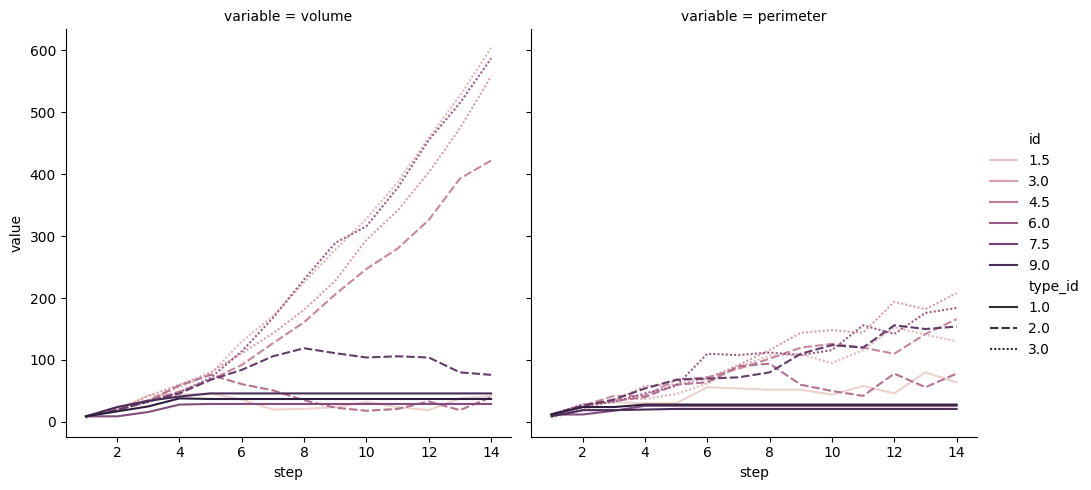

In [15]:
grid.plot_stats()
for ct in cell_types:
    print(ct.preferred_perimeter)

In [9]:
constraint_names = [c.name for c in grid.constraints]
cpm.stats.groupby("step").describe()[constraint_names]

/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg -

AdhesionConstraint                                                      \
                  count        mean         std     min   25%    50%    75%   
step                                                                          
1                 154.0  194.077922  316.171533  -428.0  -2.5  243.0  362.0   
2                 166.0  199.048193  381.086466  -666.0 -56.0  174.0  430.0   
3                 172.0  188.046512  326.750505  -666.0  -8.0  186.0  338.0   
4                 203.0  161.463054  315.516004  -518.0 -68.0  182.0  313.0   
5                 214.0  201.705607  368.799922  -670.0 -72.0  184.0  422.5   
6                 229.0  208.314410  353.167778  -698.0  -4.0  232.0  432.0   
7                 227.0  207.568282  344.502268  -756.0   8.0  188.0  338.0   
8                 227.0  191.541850  343.640661  -748.0   6.0  182.0  350.0   
9                 249.0  189.285141  340.183684  -794.0   4.0  182.0  318.0   
10                265.0  194.815094  350.363674  -822.0  -8.0  174.0  418.0   
11                261.0  188.429119  330.954284  -494.0  -6.0  182.0  418.0   
12                283.0  185.798587  336.817550  -812.0   4.0  182.0  362.0   
13                273.0  177.553114  363.770176  -856.0 -84.0  188.0  418.0   
14                298.0  238.939597  335.449971  -530.0   4.0  260.0  438.0   
15                286.0  209.678322  364.760226  -732.0  -7.5  232.0  430.0   
16                299.0  201.779264  344.449397  -684.0  -4.0  182.0  425.0   
17                300.0  225.900000  366.727209  -960.0   8.0  198.0  455.0   
18                299.0  202.301003  355.504155  -968.0  -4.0  212.0  362.0   
19                313.0  190.539936  311.737962  -558.0  -8.0  186.0  362.0   
20                355.0  204.171831  337.311732  -698.0   4.0  212.0  421.0   
21                365.0  192.649315  348.622427 -1104.0  -8.0  224.0  374.0   
22                339.0  174.227139  349.151683 -1048.0  -4.0  182.0  320.0   
23                322.0  171.201863  342.340696  -928.0 -56.0  178.0  362.0   
24                339.0  211.970501  338.681771  -657.0   4.0  238.0  421.0   
25                340.0  217.082353  342.544331  -720.0   4.0  188.0  424.0   
26                337.0  177.732938  326.952923  -728.0  -4.0  192.0  338.0   
27                333.0  171.951952  354.196321 -1160.0 -72.0  182.0  362.0   
28                335.0  189.489552  351.363809  -860.0   2.0  186.0  374.0   
29                324.0  187.333333  370.230603  -976.0 -84.0  193.0  418.0   
30                319.0  185.103448  354.394539 -1056.0   4.0  212.0  386.0   
31                317.0  174.126183  346.665540  -700.0  -8.0  174.0  350.0   
32                320.0  174.031250  347.154233  -878.0  -4.0  174.0  318.0   
33                314.0  166.219745  340.071238 -1016.0  -8.0  174.0  347.0   
34                306.0  194.196078  353.256987  -864.0  -4.0  184.0  418.0   
35                318.0  160.157233  368.743480  -952.0 -84.0  152.0  350.0   
36                322.0  195.090062  334.181794  -596.0   0.0  174.0  318.0   
37                345.0  157.211594  339.449698  -912.0  -8.0  168.0  314.0   
38                371.0  165.851752  346.454657  -888.0  -4.0  150.0  318.0   
39                381.0  182.745407  322.199719  -788.0   0.0  174.0  362.0   
40                395.0  172.417722  339.445981 -1040.0   0.0  146.0  312.0   
41                395.0  183.936709  347.836772  -844.0   0.0  174.0  350.0   
42                381.0  174.790026  334.110639 -1176.0   0.0  162.0  320.0   
43                378.0  168.547619  336.204615  -900.0  -4.0  162.0  318.0   
44                390.0  209.051282  341.258313  -440.0   0.0  174.0  424.0   
45                377.0  171.779841  327.645821  -650.0   0.0  168.0  350.0   
46                375.0  175.184000  323.451194  -818.0   0.0  168.0  320.0   
47                390.0  180.279487  315.451179 -1048.0   0.0  168.0  314.0   
48                388.0  175.301546  311.595758  -642.0

In [16]:
cpm.stats.groupby("step").describe()[["d_h_adhesion", "d_h_volume", "d_h_perimeter"]]

/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/edoardo.giacomello/Projects/Voronoi/venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/ed

d_h_adhesion                                                       \
            count        mean         std     min    25%    50%    75%   
step                                                                     
1           130.0  332.084615  355.818699  -786.0    4.0  329.0  498.0   
2           204.0  224.416667  416.341251 -1352.0   -4.0  265.0  494.0   
3           179.0  207.346369  401.179263  -804.0   -8.0  228.0  483.0   
4           152.0   84.934211  410.714571  -982.0 -246.0    2.0  364.0   
5           160.0   62.162500  353.721347 -1320.0 -197.0    8.0  264.5   
6           182.0   45.505495  399.870929 -1088.0 -246.0    8.0  310.0   
7           181.0   62.563536  390.112979 -1052.0 -198.0    4.0  274.0   
8           172.0   73.767442  382.462693 -1040.0 -164.5    4.0  316.5   
9           195.0   38.035897  397.218465 -1288.0 -236.0    4.0  286.0   

             d_h_volume                ...                         \
         max      count          mean  ...         75%        max   
step                                   ...                          
1     1124.0      130.0 -3.595553e+07  ...   -361800.0  -178200.0   
2     1084.0      204.0 -4.555054e+07  ...   -221400.0   -27000.0   
3     1138.0      179.0 -6.198129e+07  ...  -6847200.0   -16200.0   
4      994.0      152.0 -7.426854e+07  ... -95928300.0    -5400.0   
5      828.0      160.0 -8.024704e+07  ... -95723100.0 -6139800.0   
6     1078.0      182.0 -8.028673e+07  ... -95318100.0 -5805000.0   
7     1072.0      181.0 -7.633562e+07  ... -94840200.0 -5394600.0   
8     1044.0      172.0 -7.707200e+07  ... -94502700.0 -5027400.0   
9     1084.0      195.0 -7.692383e+07  ... -94111200.0 -4617000.0   

     d_h_perimeter                                                    \
             count           mean            std       min       25%   
step                                                                   
1            130.0  361847.692308  116558.043042  108900.0  280900.0   
2            204.0  238409.803922   97338.118243   16900.0  168100.0   
3            179.0  147644.134078   89494.767951   12100.0   84100.0   
4            152.0   93251.315789   63034.748103    2500.0   52900.0   
5            160.0   70729.375000   65600.074395     900.0   31525.0   
6            182.0   60525.274725   97481.028151     100.0    6400.0   
7            181.0   42877.348066   68980.022757       0.0    1600.0   
8            172.0   54391.279070   65510.543632       0.0    1600.0   
9            195.0  107384.615385   70064.220682    6400.0   28900.0   

                                    
           50%       75%       max  
step                                
1     372100.0  448900.0  608400.0  
2     240100.0  313600.0  490000.0  
3     122500.0  220900.0  372100.0  
4      78400.0  104025.0  270400.0  
5      46250.0   84100.0  270400.0  
6      14400.0   35175.0  360000.0  
7       6400.0   22500.0  260100.0  
8      19600.0  108900.0  230400.0  
9     122500.0  152100.0  280900.0  

[9 rows x 24 columns]

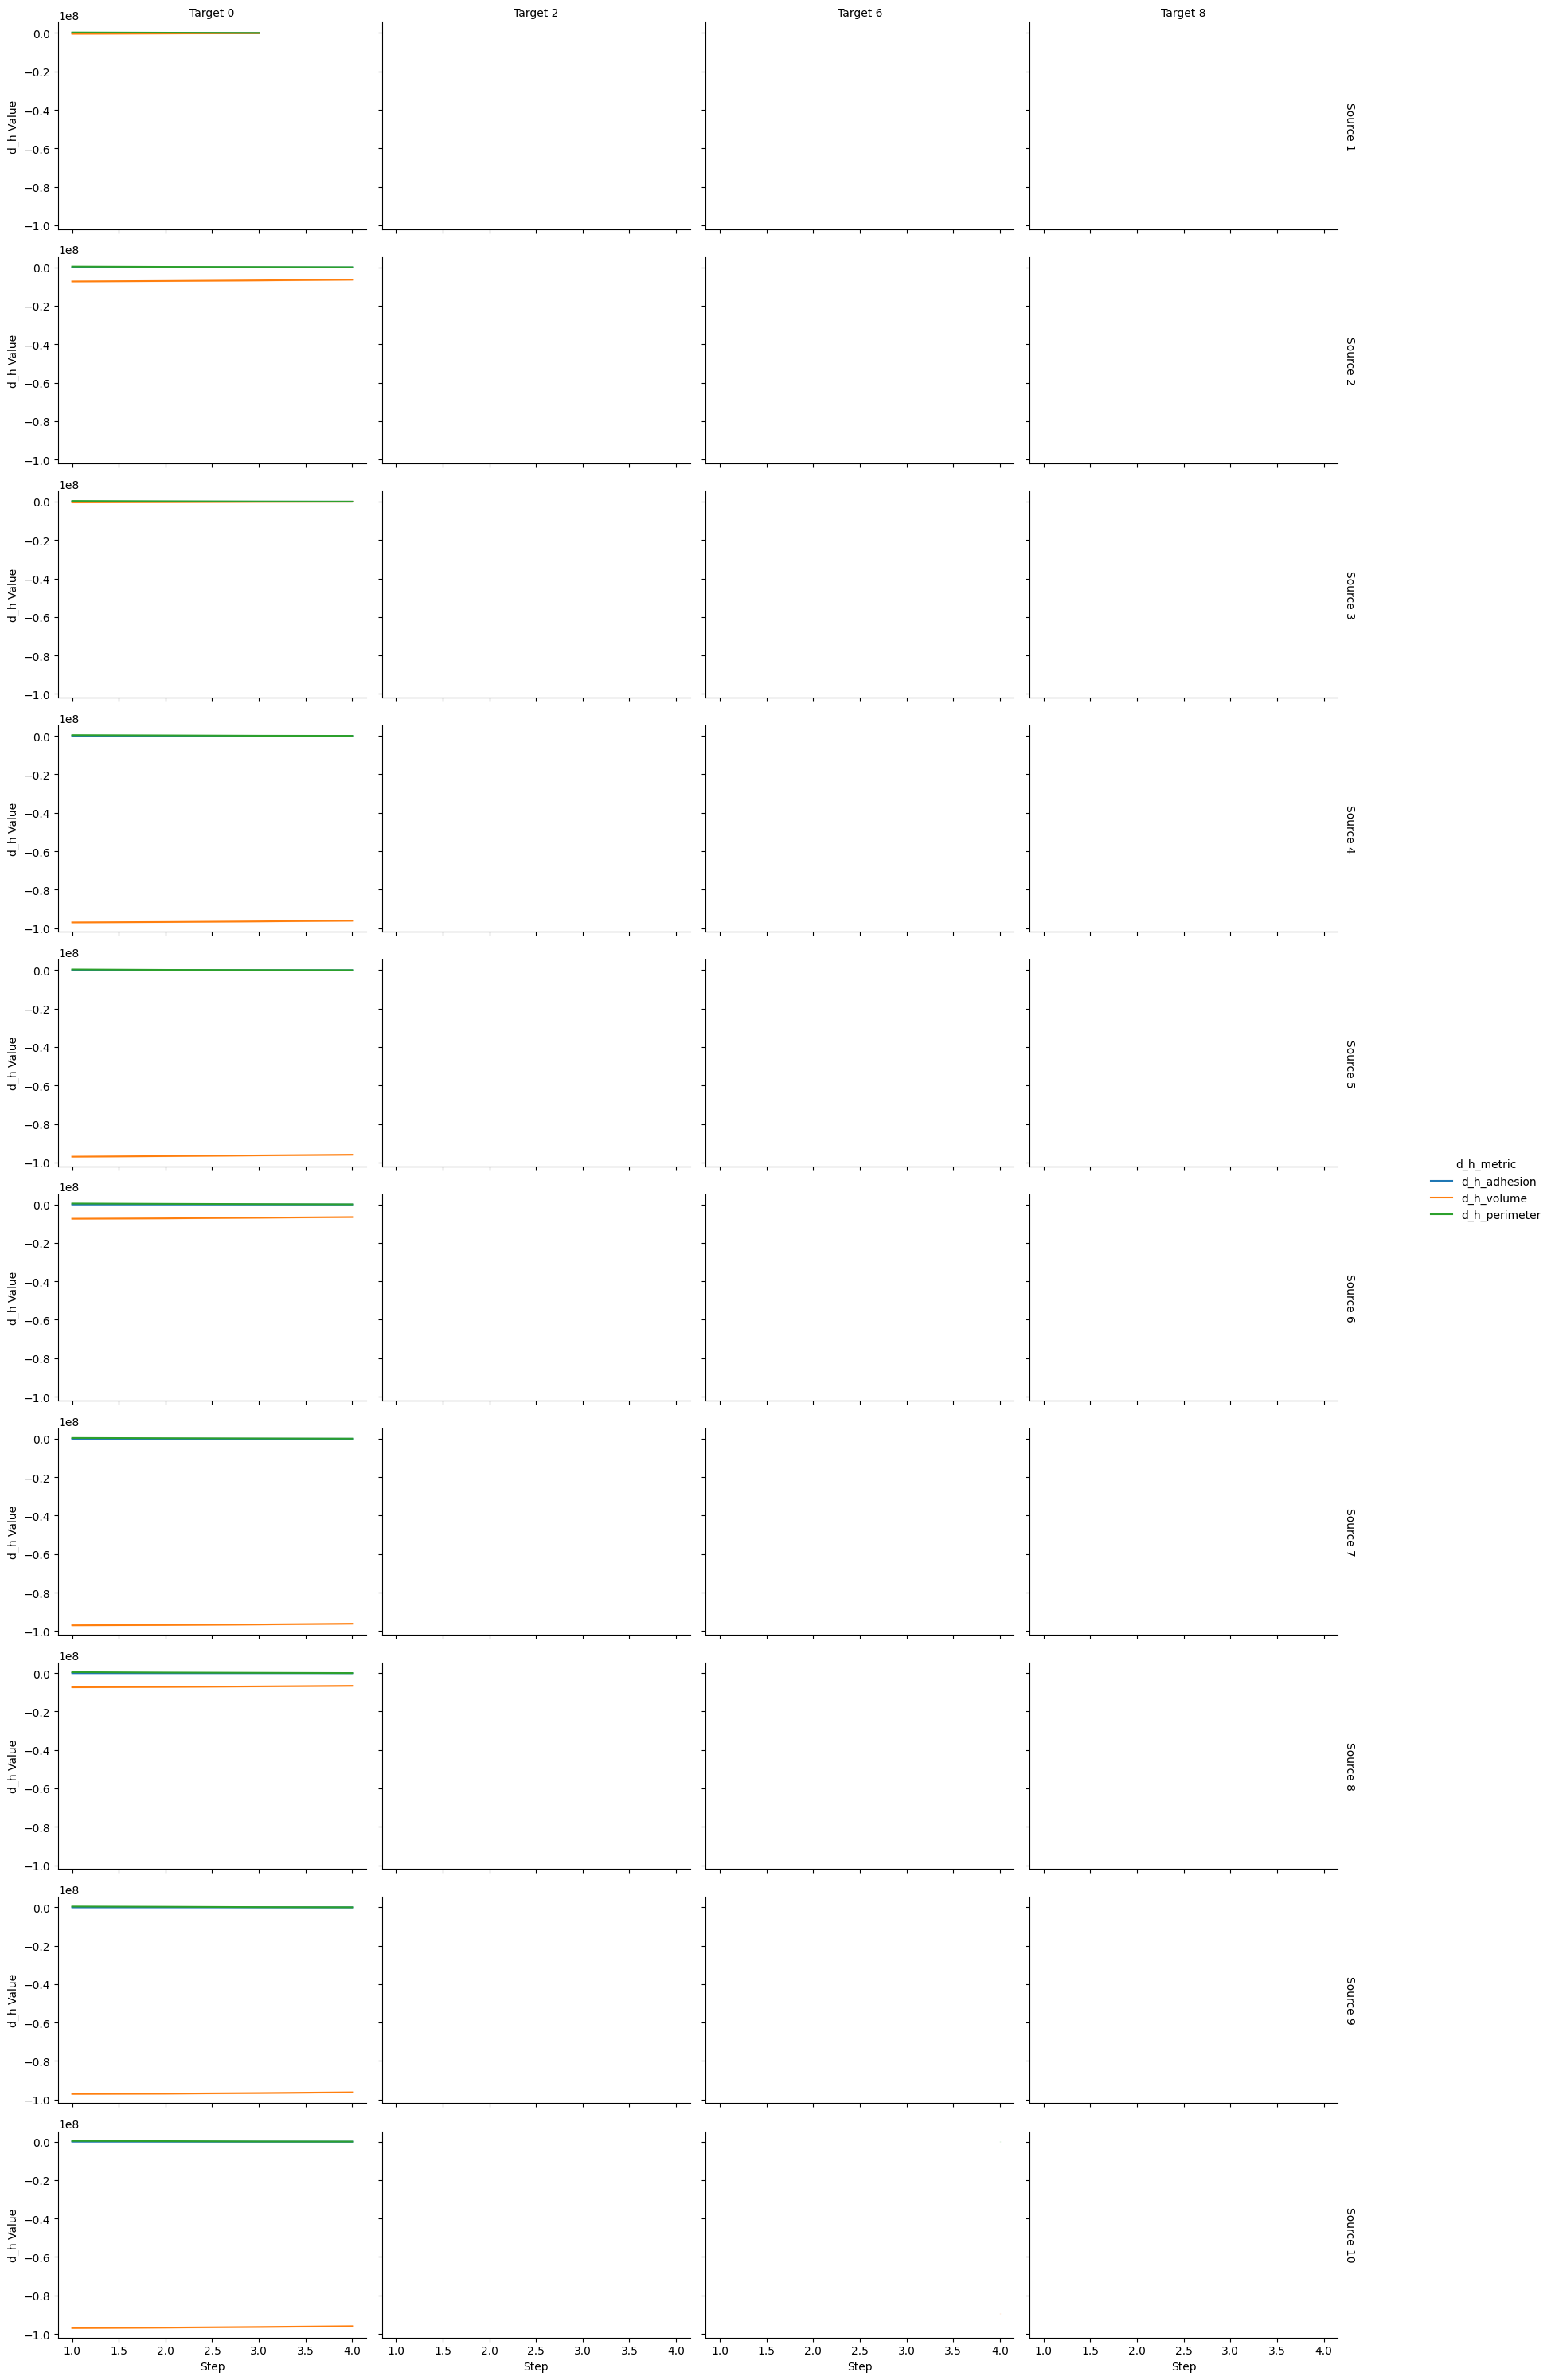

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = cpm.stats

# Reshape the data to long format for FacetGrid compatibility
melted_data = data.melt(
    id_vars=['step', 'source_cell_id', 'target_cell_id'],
    value_vars=['d_h_adhesion', 'd_h_volume', 'd_h_perimeter'],
    var_name='d_h_metric', 
    value_name='d_h_value'
)

# Set up the FacetGrid with source_cell_id as rows and target_cell_id as columns
g = sns.FacetGrid(
    melted_data, 
    row="source_cell_id", 
    col="target_cell_id", 
    hue="d_h_metric", 
    margin_titles=True, 
    height=3,
    aspect=1.5
)

# Map the lineplot to each facet
g.map(sns.lineplot, 'step', 'd_h_value').add_legend()

# Add axis labels and titles
g.set_axis_labels("Step", "d_h Value")
g.set_titles(row_template="Source {row_name}", col_template="Target {col_name}")
g.tight_layout()

plt.show()
